In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('Job_Placement_Data.csv')
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [44]:
df.shape

(215, 13)

In [45]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [48]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index

In [49]:
for i in num_cols:
    print(f'Features {i}')
    print(df[i].nunique())
    print('*'*20)

Features ssc_percentage
103
********************
Features hsc_percentage
97
********************
Features degree_percentage
89
********************
Features emp_test_percentage
100
********************
Features mba_percent
205
********************


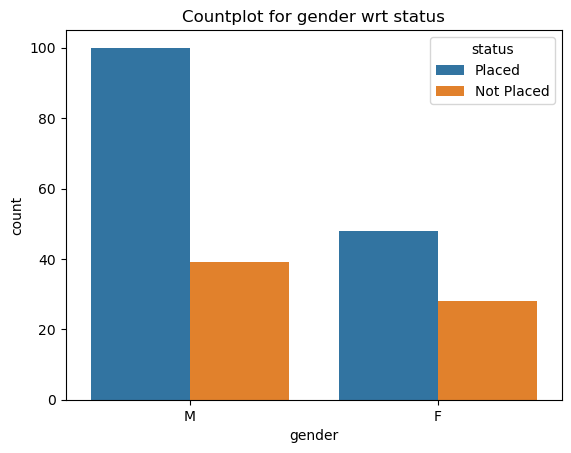

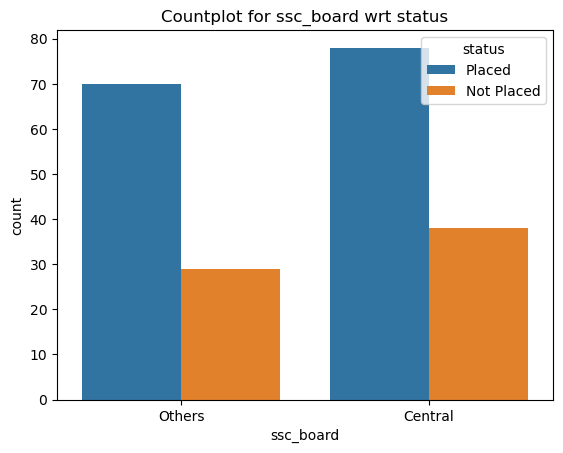

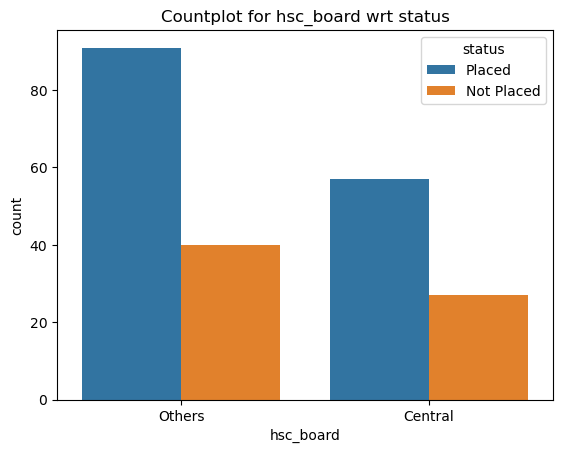

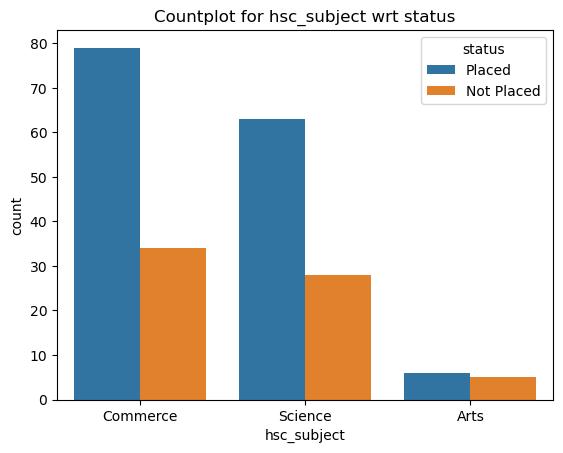

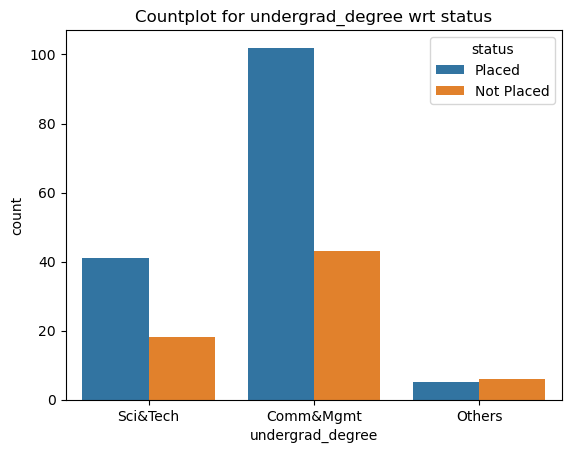

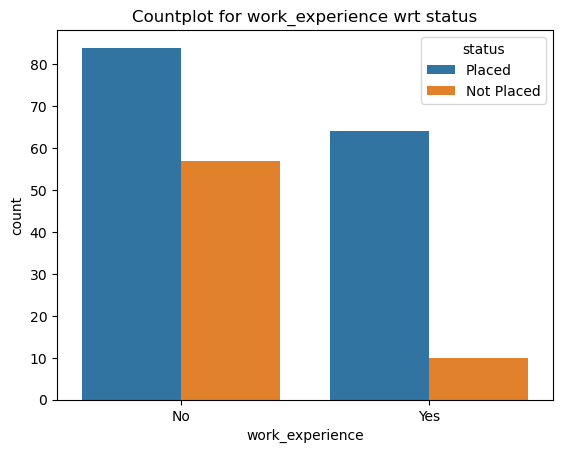

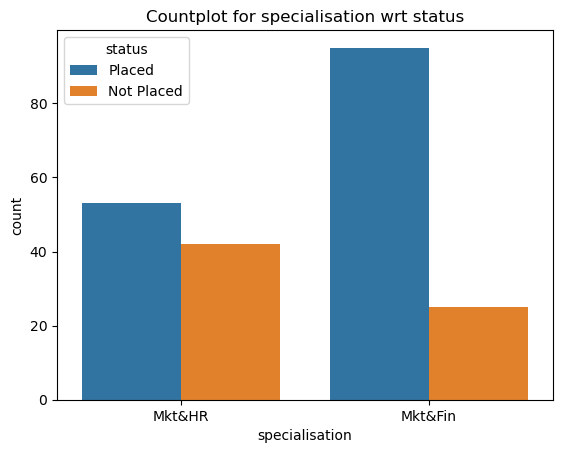

In [50]:
for i in cat_cols[:-1]:
    sns.countplot(x=df[i],hue=df['status'])
    plt.title(f'Countplot for {i} wrt status')
    plt.show()

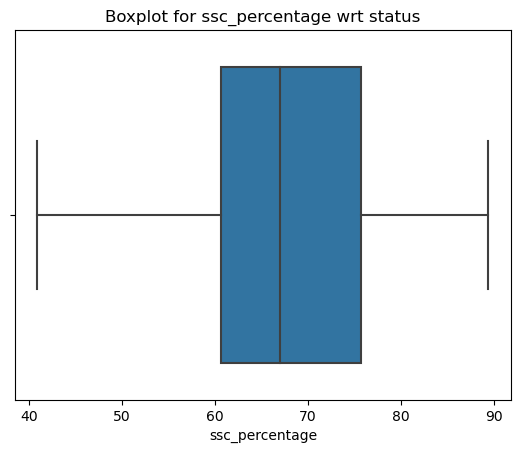

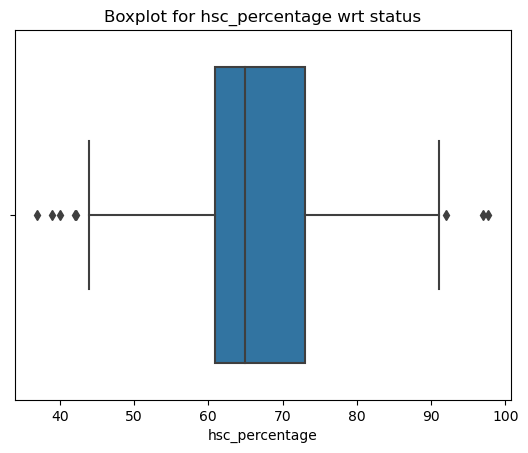

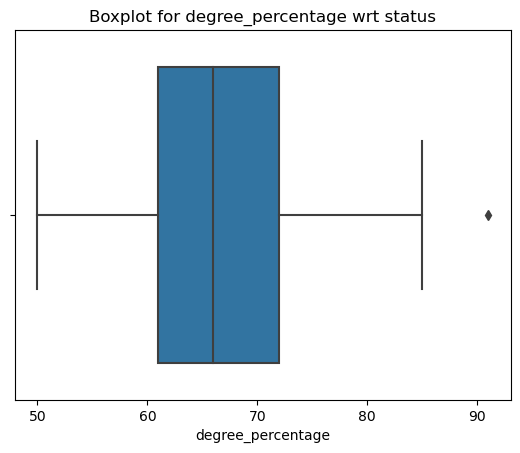

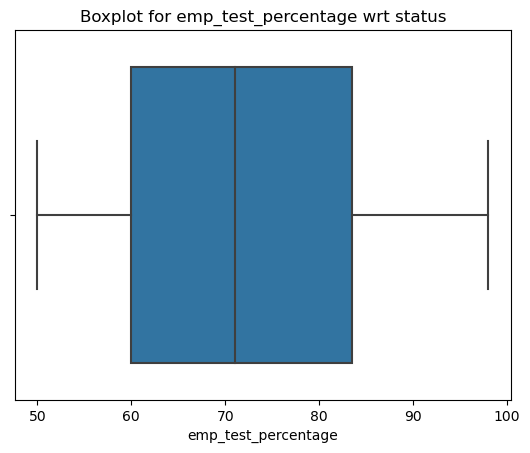

In [51]:
for i in num_cols[:-1]:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i} wrt status')
    plt.show()

In [52]:
x = df.drop('status',axis=1)
y = df['status']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(215, 12)
(215,)


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(161, 12)
(54, 12)
(161,)
(54,)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [58]:
step1 = ColumnTransformer(transformers=
                         [('enc_col',OneHotEncoder(drop='first',sparse=False),[0,2,4,5,7,8,10]),
                         ('robust_scale',RobustScaler(),[3])],
                         remainder='passthrough')

step2 = LogisticRegression(max_iter=1000)

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

[[13  2]
 [ 5 34]]
              precision    recall  f1-score   support

  Not Placed       0.72      0.87      0.79        15
      Placed       0.94      0.87      0.91        39

    accuracy                           0.87        54
   macro avg       0.83      0.87      0.85        54
weighted avg       0.88      0.87      0.87        54



In [59]:
step1 = ColumnTransformer(transformers=
                         [('enc_col',OneHotEncoder(drop='first',sparse=False),[0,2,4,5,7,8,10]),
                         ('robust_scale',RobustScaler(),[3])],
                         remainder='passthrough')

step2 = KNeighborsClassifier(n_neighbors=11)

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

[[11  4]
 [ 4 35]]
              precision    recall  f1-score   support

  Not Placed       0.73      0.73      0.73        15
      Placed       0.90      0.90      0.90        39

    accuracy                           0.85        54
   macro avg       0.82      0.82      0.82        54
weighted avg       0.85      0.85      0.85        54



C:\Users\tssin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [60]:
import pickle

In [61]:
pickle.dump(pipe_lr,open('lr1.pkl','wb'))
pickle.dump(df,open('df1.pkl','wb'))

In [62]:
df.columns


Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [63]:
import sklearn

In [66]:
sklearn.__version__

'1.0.2'